#### ISA 414 A 
#### Final Project
#### Friday, May 6th, 2022
#### Gina Krynski


### Data Cleaning Begins

In [4]:
# Importing imdb disney movie data set into notebook
import pandas as pd
movies = pd.read_csv("disney_movies.csv")

# Looking at an overview of the data set
# Displaying the first 5 rows of the data set 
print(movies.head())

                       movie_title release_date      genre mpaa_rating  \
0  Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                        Pinocchio   1940-02-09  Adventure           G   
2                         Fantasia   1940-11-13    Musical           G   
3                Song of the South   1946-11-12  Adventure           G   
4                       Cinderella   1950-02-15      Drama           G   

   total_gross  inflation_adjusted_gross  
0    184925485                5228953251  
1     84300000                2188229052  
2     83320000                2187090808  
3     65000000                1078510579  
4     85000000                 920608730  


In [7]:
# Examining the variable types of the data set
movies.dtypes


movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

In [8]:
# Seeing how many null values are in a column 
movies.info()

# Sum up the null values for each variable
movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [9]:
# Cleaning up the formatting of the release date variable
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d') # changing year format 

# Keeping all movies released in 2010 and earlier
old_movies = movies[movies['release_date'] < '2010-01-01']

# Dropping the mpaa_rating column and the total gross profit column
clean_movies = old_movies.drop(columns=['mpaa_rating', 'total_gross'])

In [10]:
# making a column that contains only the release year of the movie 
# Release year column is a useful variable to include because it will make it easier to organize by decade later on in our exploratory data analysis
clean_movies['year'] = pd.DatetimeIndex(clean_movies['release_date']).year
clean_movies.head()



,movie_title,release_date,genre,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,2188229052,1940
2,Fantasia,1940-11-13,Musical,2187090808,1940
3,Song of the South,1946-11-12,Adventure,1078510579,1946
4,Cinderella,1950-02-15,Drama,920608730,1950


### Exploratory Data Analysis Begins

In [11]:
# Importing modules for more complex exploratory data analysis
import numpy as np #library for calculations on Multidimensional Arrays
from pylab import rcParams #libary for customizing the properties and default styles of Matplotlib
import seaborn as sns #library for statistical data visualization
import matplotlib.pyplot as plt #library that provides a MATLAB-like way of plotting
sns.set(style='ticks', color_codes=True)
sns.set(style='whitegrid')
import statistics as stat #library for statistical data visualization

In [12]:
# Retrieving the five number summary for the cleaned movie data set
clean_movies.describe()

# Ignore the year five number summary - does not make a whole lot of sense given the context of the year variable
# Pay attention to the gross profit adjusted for inflation variable

,inflation_adjusted_gross,year
count,4.930000e+02,493.000000
mean,1.128053e+08,1995.405680
std,3.014775e+08,10.314059
min,0.000000e+00,1937.000000
25%,2.194184e+07,1992.000000
50%,5.137391e+07,1996.000000
75%,1.100584e+08,2002.000000
max,5.228953e+09,2009.000000


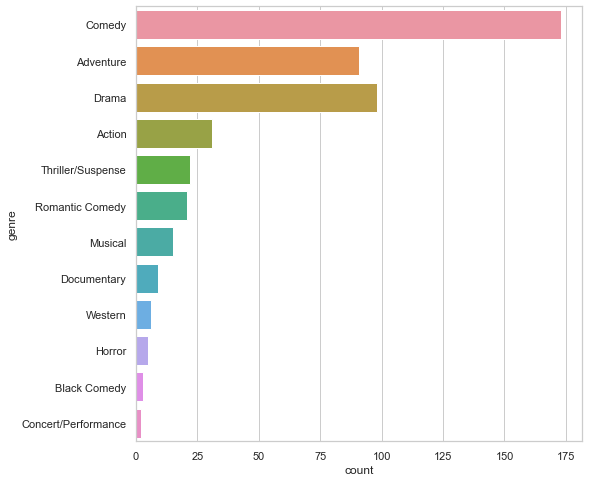

In [13]:
# Looking closer at the genre variable 
# visualizing the genre data 
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=clean_movies, order=movies['genre'].value_counts().index)
plt.show()

# Comedy has the highest number of movies in it, followed by Adventure, Drama, Action, and Thriller/Suspense, etc. 

In [14]:
# Sorting genres of movies by gross profit 
top_genres = clean_movies.groupby(by='genre').sum().sort_values(by='inflation_adjusted_gross', ascending=False)
print(top_genres)

                     inflation_adjusted_gross    year
genre                                                
Adventure                         16211995567  181684
Comedy                            14886208716  345164
Musical                            9526671539   29735
Drama                              7094439940  195520
Action                             2866691478   61857
Thriller/Suspense                  2051807642   43968
Romantic Comedy                    1697994194   41947
Western                             424112558   11999
Black Comedy                        156730475    5996
Horror                              121030690    9972
Concert/Performance                 114821678    4017
Documentary                          92899224   18055


In [15]:
# Make a data frame of movies that are in the top five genres based on gross profit adjusted for inflation 
top_5_genres = clean_movies[clean_movies['genre'].isin(['Adventure', 'Comedy', 'Musical', 'Drama', 'Action'])]

In [16]:
# Sort the movies from the top 5 highest grossing genres by gross profit adjusted for inflation
# Put into data frame called ordered movies 
ordered_movies = top_5_genres.sort_values(by='inflation_adjusted_gross', ascending=False)


# Get the top five movies highest grossing movies for each of the type five genres and group by the genre variable
top_10_movies = ordered_movies.groupby('genre').head(10).reset_index(drop=True)
top_10_movies.head()
# open data frame and filter genre by alphabetical order

,movie_title,release_date,genre,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,2188229052,1940
2,Fantasia,1940-11-13,Musical,2187090808,1940
3,101 Dalmatians,1961-01-25,Comedy,1362870985,1961
4,Lady and the Tramp,1955-06-22,Drama,1236035515,1955


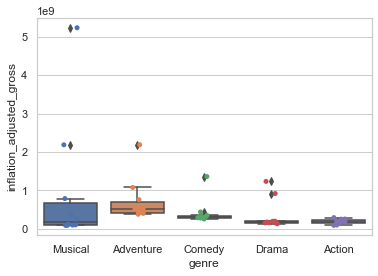

In [17]:
# Get the top 10 movies highest grossing movies for each of the type five genres and group by the genre variable
top_10_movies = ordered_movies.groupby('genre').head(10).reset_index(drop=True)

boxplot_of_top_10 = sns.boxplot(x='genre', y='inflation_adjusted_gross',
data=top_10_movies)
boxplot_of_top_10 = sns.stripplot(x='genre', y='inflation_adjusted_gross',
data=top_10_movies, jitter=True,
edgecolor='gray')
rcParams['figure.figsize'] = 20,30

# does not look like there are any outliers for the action genre 

Text(0.5, 1.0, 'Relationship between Top 5 Genres & Gross Profit Adjusted for Inflation')

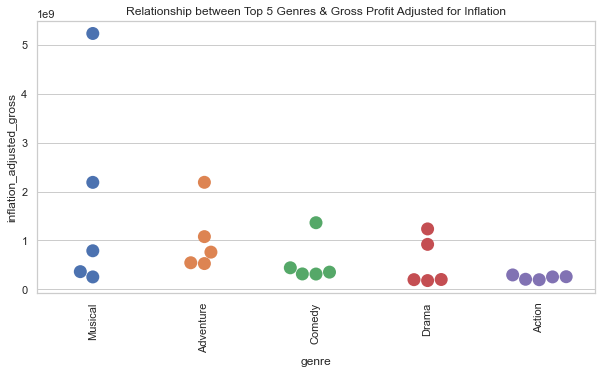

In [18]:
# Narrowing down to top 5 movies for the top 5 genres
top_5_movies = ordered_movies.groupby('genre').head(5).reset_index(drop=True)

# analyzing the relationship bw genre and gross income
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x='genre',y='inflation_adjusted_gross',data=top_5_movies, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title('Relationship between Top 5 Genres & Gross Profit Adjusted for Inflation')


In [19]:
# Finding the maximum gross profit adjusted for inflation movie 
max_grossprofit_adj4inflation = max(clean_movies.inflation_adjusted_gross)
print('Maximum Value: ', max_grossprofit_adj4inflation)


Maximum Value:  5228953251


In [20]:
print(clean_movies[(clean_movies['inflation_adjusted_gross'] >= 5000000000)])

                       movie_title release_date    genre  \
0  Snow White and the Seven Dwarfs   1937-12-21  Musical   

   inflation_adjusted_gross  year  
0                5228953251  1937  


In [21]:
#???
# movies with zero adjusted for inflation 
# should we take these out of the clean movies data set
clean_movies[(clean_movies['inflation_adjusted_gross'] == 0)]

,movie_title,release_date,genre,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,0,1977
27,Amy,1981-03-20,Drama,0,1981
29,Condorman,1981-08-07,Action,0,1981
355,Frank McKlusky C.I.,2002-01-01,NaN,0,2002


In [22]:
# ???
# movies with zero adjusted for inflation 
df_null_genres= clean_movies[clean_movies['genre'].isnull()]
print(df_null_genres)

                                movie_title release_date genre  \
20   The Many Adventures of Winnie the Pooh   1977-03-11   NaN   
22               Herbie Goes to Monte Carlo   1977-06-24   NaN   
23                           The Black Hole   1979-12-21   NaN   
24                         Midnight Madness   1980-02-08   NaN   
25            The Last Flight of Noah’s Ark   1980-06-25   NaN   
26                 The Devil and Max Devlin   1981-01-01   NaN   
121                                 Newsies   1992-04-08   NaN   
122                             Passed Away   1992-04-24   NaN   
128            A Gun in Betty Lou's Handbag   1992-08-21   NaN   
146                          Bound by Honor   1993-04-16   NaN   
155                     My Boyfriend's Back   1993-08-06   NaN   
156                             Father Hood   1993-08-27   NaN   
168                           Red Rock West   1994-01-28   NaN   
251                         The War at Home   1996-11-20   NaN   
304       

In [23]:
# ??????
print(len(df_null_genres))
# 17 null genre values

17


In [24]:
# organizing movies by decade 
top_5_movies['decade'] = 0
# initialize decade variable

In [25]:
# Organizing top 10 movies by genre for each decade 
top_5_movies.loc[(top_5_movies['year'] >= 1930) & (top_5_movies['year'] < 1940), 'decade'] = '1930s'
top_5_movies.loc[(top_5_movies['year'] >= 1940) & (top_5_movies['year'] < 1950), 'decade'] = '1940s'
top_5_movies.loc[(top_5_movies['year'] >= 1950) & (top_5_movies['year'] < 1960), 'decade'] = '1950s'
top_5_movies.loc[(top_5_movies['year'] >= 1960) & (top_5_movies['year'] < 1970), 'decade'] = '1960s'
top_5_movies.loc[(top_5_movies['year'] >= 1970) & (top_5_movies['year'] < 1980), 'decade'] = '1970s'
top_5_movies.loc[(top_5_movies['year'] >= 1980) & (top_5_movies['year'] < 1990), 'decade'] = '1980s'
top_5_movies.loc[(top_5_movies['year'] >= 1990) & (top_5_movies['year'] < 2000), 'decade'] = '1990s'
top_5_movies.loc[(top_5_movies['year'] >= 2000) & (top_5_movies['year'] < 2010), 'decade'] = '2000s'
top_5_movies.loc[(top_5_movies['year'] >= 2010) & (top_5_movies['year'] <= 2016), 'decade'] = '2010s'

<AxesSubplot:xlabel='decade'>

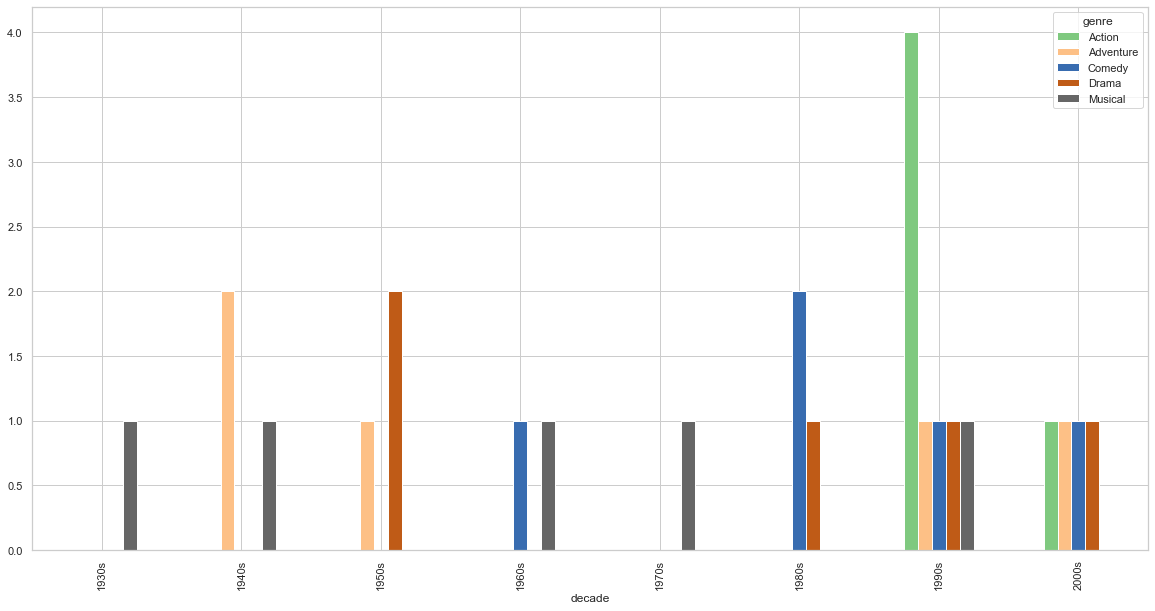

In [26]:
# The Sum of the Top 10 Highest Grossing Movies for each of the Top 5 Genres organized by Decade
top_5_movies.groupby(['decade', 'genre']).size().unstack().plot.bar(colormap='Accent', figsize=(20, 10))

# not every decade had a movie from every genre


### Reddit Data Scrapping 
#### Subreddit 1: Cruella Movie Reviews

In [27]:
import requests
import pandas

# retrieving the response in JSON; the "headers" argument tells Reddit "who" is asking for data to prevent "too many requests" errors
response = requests.get("https://www.reddit.com/r/disney/comments/shoujo/so_about_that_cruella_movie.json", headers = {'User-agent': 'ISA 514/414'})
response = response.json()

# retrieving post info: first key-value pair, i.e., position 0 in the JSON file
df_post = pandas.json_normalize(response[0]["data"]["children"][0]["data"])

# creating an empty data frame
df_comments = pandas.DataFrame()

# retrieving comments info: second key-value pair, i.e., position 1 in the JSON file
# for each post in the data -> children branch
for post in response[1]["data"]["children"]:

    # create a row for the values associated with the 'data' key
    json_to_row = pandas.json_normalize(post["data"])

    # append data to empty data frame
    df_comments = df_comments.append(json_to_row)

## Save subset of df_comments that contains only the comment text
cruella_comments = df_comments[['body']]

/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/498754594.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/498754594.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/498754594.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/498754594.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

#### Subreddit 2: Mulan Movie Reviews

In [28]:
# retrieving the response in JSON; the "headers" argument tells Reddit "who" is asking for data to prevent "too many requests" errors
response = requests.get("https://www.reddit.com/r/boxoffice/comments/pi5wpn/mulan_2020_was_released_a_year_ago_today_the_film.json", headers = {'User-agent': 'ISA 514/414'})
response = response.json()

# retrieving post info: first key-value pair, i.e., position 0 in the JSON file
df_post = pandas.json_normalize(response[0]["data"]["children"][0]["data"])

# creating an empty data frame
df_comments = pandas.DataFrame()

# retrieving comments info: second key-value pair, i.e., position 1 in the JSON file
# for each post in the data -> children branch
for post in response[1]["data"]["children"]:

    # create a row for the values associated with the 'data' key
    json_to_row = pandas.json_normalize(post["data"])

    # append data to empty data frame
    df_comments = df_comments.append(json_to_row)

## Save subset of df_comments that contains only the comment text
mulan_comments = df_comments[['body']]

/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2825206113.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2825206113.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2825206113.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2825206113.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

#### Subreddit 3: Cinderella 2015 Movie Reviews

In [29]:
# retrieving the response in JSON; the "headers" argument tells Reddit "who" is asking for data to prevent "too many requests" errors
response = requests.get("https://www.reddit.com/r/movies/comments/2ysbqi/official_discussion_cinderella_2015_spoilers.json", headers = {'User-agent': 'ISA 514/414'})
response = response.json()

# retrieving post info: first key-value pair, i.e., position 0 in the JSON file
df_post = pandas.json_normalize(response[0]["data"]["children"][0]["data"])

# creating an empty data frame
df_comments = pandas.DataFrame()

# retrieving comments info: second key-value pair, i.e., position 1 in the JSON file
# for each post in the data -> children branch
for post in response[1]["data"]["children"]:

    # create a row for the values associated with the 'data' key
    json_to_row = pandas.json_normalize(post["data"])

    # append data to empty data frame
    df_comments = df_comments.append(json_to_row)
 
## Save subset of df_comments that contains only the comment text
cinderella_2015_comments = df_comments[['body']]

/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/753173694.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/753173694.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/753173694.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/753173694.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

#### Subreddit 4: Amazon's Cinderella Movie Reviews

In [30]:
# retrieving the response in JSON; the "headers" argument tells Reddit "who" is asking for data to prevent "too many requests" errors
response = requests.get("https://www.reddit.com/r/movies/comments/phcg6n/cinderella_on_amazon_with_camila_cabello.json", headers = {'User-agent': 'ISA 514/414'})
response = response.json()

# retrieving post info: first key-value pair, i.e., position 0 in the JSON file
df_post = pandas.json_normalize(response[0]["data"]["children"][0]["data"])

# creating an empty data frame
df_comments = pandas.DataFrame()

# retrieving comments info: second key-value pair, i.e., position 1 in the JSON file
# for each post in the data -> children branch
for post in response[1]["data"]["children"]:

    # create a row for the values associated with the 'data' key
    json_to_row = pandas.json_normalize(post["data"])

    # append data to empty data frame
    df_comments = df_comments.append(json_to_row)
    
## Save subset of df_comments that contains only the comment text
cinderella_amazon_comments = df_comments[['body']]

/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2297134144.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2297134144.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2297134144.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comments = df_comments.append(json_to_row)
/var/folders/x5/ml5dd1h14kzbwjdt0wmhps480000gn/T/ipykernel_35323/2297134144.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

## Creating a Sentiment Analyzer Function:
Using this function allows us to reuse the sentiment analysis code when evaluating the comments from each subreddit. 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

def sentiment_analyzer (df): 

    raw_data = df
    enc = TfidfVectorizer(use_idf = False)
    sparse_matrix = enc.fit_transform(raw_data["body"])
    all_word_names = enc.get_feature_names()

    file = open('positive-words.txt', 'r')
    positive_words = file.read().splitlines() 

    file = open('negative-words.txt', 'r')
    negative_words = file.read().splitlines() 

    positive_comments = 0;
    negative_comments =0;
    for i in range(0, len(raw_data)):

        rows, columns = sparse_matrix[i,:].nonzero()
        doc_word_names = [all_word_names[index] for index in columns]


        doc_positive_words = [positive_words.count(word) for word in doc_word_names]
        doc_negative_words = [negative_words.count(word) for word in doc_word_names]

        score = sum(doc_positive_words) - sum(doc_negative_words)
        if score > 0: positive_comments = positive_comments + 1
        if score < 0: negative_comments = negative_comments + 1

    result1 = pd.DataFrame(data = {'Positive Comments': [positive_comments], 'Negative Comments': [negative_comments]})
    positivity_percentage = positive_comments / (positive_comments + negative_comments)
    return positivity_percentage


In [33]:
cruella_results = sentiment_analyzer(cruella_comments)
print(str(int(cruella_results * 100)) + " percent of the comments are Positive for the Cruella movie ")

75 percent of the comments are Positive for the Cruella movie 


/Users/ginakrynski/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
mulan_results = sentiment_analyzer(mulan_comments)
print(str(int(mulan_results * 100)) + " percent of the comments are Positive for the Mulan movie ")


55 percent of the comments are Positive for the Mulan movie 


In [35]:
cinderella_2015_comments = cinderella_2015_comments.dropna()
cinderella_2015_results = sentiment_analyzer(cinderella_2015_comments)
print(str(int(cinderella_2015_results * 100)) + " percent of the comments are Positive for the Disneys 2015 Cinderella movie ")



85 percent of the comments are Positive for the Disneys 2015 Cinderella movie 


In [36]:
cinderella_amazon_results = sentiment_analyzer(cinderella_amazon_comments)
print(str(int(cinderella_amazon_results * 100)) + " percent of the comments are Positive for Amazon's Cinderella movie ")


65 percent of the comments are Positive for Amazon's Cinderella movie 
